In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt
from load import load_data
from load import train_test_split
from load import get_measures


import warnings # retirar avisos
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 15, 5

In [2]:
df = load_data()
df["load_mwmed"].interpolate(method = "linear", inplace = True)

In [3]:
n_test = 15
train, test = train_test_split(df, n_test)
train

fit1 = ExponentialSmoothing(train ,seasonal_periods=7,trend='add', seasonal='add',).fit()
y_hat = fit1.forecast(1)
y_hat

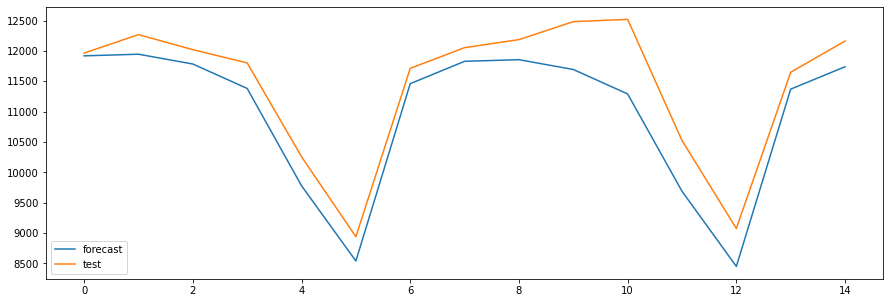

In [4]:
n_test = 15
train, test = train_test_split(df, n_test)
train

fit1 = ExponentialSmoothing(train ,seasonal_periods=7,trend='add', seasonal='add',).fit()
y_hat = fit1.forecast(n_test)

plt.plot(y_hat.reset_index(drop = True), label = "forecast")
plt.plot(test.load_mwmed.reset_index(drop = True), label = "test")
plt.legend()
plt.show()

In [5]:
y_hat

8173    11919.438150
8174    11946.066058
8175    11784.821545
8176    11382.056437
8177     9779.047721
8178     8538.660342
8179    11460.624157
8180    11829.457701
8181    11856.085609
8182    11694.841096
8183    11292.075988
8184     9689.067272
8185     8448.679893
8186    11370.643708
8187    11739.477252
dtype: float64

In [39]:
medidas_fc = get_measures(y_hat, test.load_mwmed) 
df_medidas_fc = pd.DataFrame([medidas_fc])
df_medidas_fc

,erro,mae,mse,rmse,mape,smape
0,4.428673e+06,459.395068,295244.881335,543.364409,0.040827,4.202007
